In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Sử Dụng API Thu Thập Dữ Liệu Từ OpenWeather**

In [ ]:
from google.colab import drive
import requests
from datetime import datetime
import csv

def translate_weather_description(english_description):
    vietnamese_translation = {
        'overcast clouds': 'Mây u ám',
        'scattered clouds': 'Mây rải rác',
        'broken clouds': 'Mây rải rác',
        'few clouds': 'Mây ít',
        'light rain': 'Mưa nhẹ',
        'moderate rain': 'Mưa vừa',
    }

    return vietnamese_translation.get(english_description, 'Không xác định')

def get_weather_data(api_key, city_names):
    base_url = "http://api.openweathermap.org/data/2.5/weather"
    weather_data = []

    for city_name in city_names:
        params = {
            'q': city_name,
            'appid': api_key,
            'units': 'metric',
        }
        try:
            response = requests.get(base_url, params=params)
            data = response.json()

            if response.status_code == 200:
                city = data['name']
                temperature = data['main']['temp']
                humidity = data['main']['humidity']
                wind_speed = data['wind']['speed']
                pressure = data['main']['pressure']
                apparent_temperature = data['main']['feels_like']
                wind_bearing = data['wind'].get('deg', 'N/A')
                cloud_cover = data['clouds']['all']
                visibility = data.get('visibility', 'N/A')
                timestamp = data['dt']
                local_date = datetime.utcfromtimestamp(timestamp + data['timezone']).strftime('%Y-%m-%d %H:%M:%S.%f %z')
                weather_description = data['weather'][0]['description']
                rain = data.get('rain', {}).get('1h', 0)

                weather_data.append([city, local_date, temperature, humidity, wind_speed, pressure,
                                     apparent_temperature, wind_bearing, cloud_cover, visibility,
                                     weather_description, rain])

            else:
                print(f"Error for {city_name}: {data['message']}")
        except Exception as e:
            pass

    return weather_data

api_key = '28d4528321a2f10e05e76a0b940df9c1'

city_names = [
    'Ho Chi Minh', 'Ha Noi', 'Da Nang', 'Haiphong', 'Bien Hoa', 'Can Tho', 'Thu Dau Mot', 'Di An', 'Hue', 'Vung Tau',
    'Thu Dau Mot', 'Nha Trang', 'Ha Long', 'Qui Nhon',
    'Thanh Hoa', 'Thai Nguyen', 'Buon Ma Thuot', 'Long Xuyen', 'Phu Khuong', 'Vinh', 'Rach Gia', 'Da Lat', 'Bac Ninh',
    'Hai Duong', 'Phan Thiet', 'Pleiku', 'Nam Dinh',
    'Ca Mau', 'Viet Tri', 'Soc Trang', 'Quang Ngai', 'Thai Binh', 'My Tho', 'Tuy Hoa', 'Bac Lieu', 'Uong Bi', 'Bac Giang',
    'Tay Ninh', 'Ninh Binh', 'Tan An', 'Kon Tum', 'Tam Ky',
    'Vinh Long', 'Lao Cai', 'Lagi', 'Rach Gia', 'Con Son', 'Cho Dok', 'Loc Ninh', 'Phan Rang-Thap Cham', 'Kwang Binh',
    'Dien Bien Phu', 'Turan', 'Don Luan', 'Loc Ninh',
    'Song Cau', 'Bim Son', 'Cu Chi', 'Uyen Hung', 'Ben Tre', 'Sa Dec', 'Ap Van Tu Tay', 'Song Cau', 'Ngo Chau', 'Hoi An',
    'Dong Ha', 'Bim Son', 'Phu Ly', 'Hai Ha',
    'Ha Dong', 'Hau Duong', 'Yen Lap', 'Thanh Ba', 'Doan Hung', 'Son Duong'
]

weather_data = get_weather_data(api_key, city_names)

output_date = datetime.now().strftime('%Y-%m-%d')
output_path = f'/content/gdrive/MyDrive/Chuyen_De_Tot_Nghiep_01/Đồ_Án_CĐTN_01/data/weather_data_{output_date}.csv'

with open(output_path, 'w', newline='') as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(['Địa Điểm', 'Ngày/Giờ', 'Nhiệt Độ (°C)', 'Độ Ẩm (%)', 'Tốc Độ Gió (m/s)', 'Áp Suất (hPa)', 'Mức Đo Nhiệt Độ', 'Góc Hướng Gió', 'Độ Mây Che phủ', 'Tầm Nhìn(km)', 'Mô Tả Thời Tiết', 'Thời Tiết'])

    for data in weather_data:
        name = data[0]
        date = data[1]
        temperature = data[2]
        humidity = data[3]
        wind_speed = data[4]
        pressure = data[5]
        apparent_temperature = data[6]
        wind_bearing = data[7]
        cloud_cover = data[8]
        visibility = data[9]
        description = data[10]
        rain = data[11]


        vietnamese_description = translate_weather_description(description)
        if float(rain) > 0.1:
            rain_category = "Mưa"
        else:
            rain_category = "Nắng"

        csv_writer.writerow([name, date, temperature, humidity, wind_speed, pressure, apparent_temperature, wind_bearing, cloud_cover, visibility, vietnamese_description, rain_category])

print(f"Đã Lưu Vào: '{output_path}'")


Đã Lưu Vào: '/content/gdrive/MyDrive/Chuyen_De_Tot_Nghiep_01/Đồ_Án_CĐTN_01/data/weather_data_2023-12-14.csv'


**Gộp Data**

In [ ]:
import os
import pandas as pd

folder_path = '/content/gdrive/MyDrive/Chuyen_De_Tot_Nghiep_01/Đồ_Án_CĐTN_01/data'

files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

combined_data = pd.DataFrame()


for file in files:
    file_path = os.path.join(folder_path, file)
    df = pd.read_csv(file_path)
    combined_data = pd.concat([combined_data, df], ignore_index=True)


output_path = '/content/gdrive/MyDrive/Chuyen_De_Tot_Nghiep_01/Đồ_Án_CĐTN_01/data/weather_data.csv'
combined_data.to_csv(output_path, index=False)

print(f"Đã gộp dữ liệu thành công: {output_path}")

Đã gộp dữ liệu thành công: /content/gdrive/MyDrive/Chuyen_De_Tot_Nghiep_01/Đồ_Án_CĐTN_01/data/weather_data.csv


**XỬ LÝ DỮ LIỆU**

In [ ]:
import pandas as pd

data = pd.read_csv('/content/gdrive/MyDrive/Chuyen_De_Tot_Nghiep_01/Đồ_Án_CĐTN_01/data/weather_data.csv')
data.head()


,Địa Điểm,Ngày/Giờ,Nhiệt Độ (°C),Độ Ẩm (%),Tốc Độ Gió (m/s),Áp Suất (hPa),Mức Đo Nhiệt Độ,Góc Hướng Gió,Độ Mây Che phủ,Tầm Nhìn(km),Mô Tả Thời Tiết,Thời Tiết
0,Ho Chi Minh City,2023-11-12 20:06:59.000000,27.01,94,2.06,1012,31.20,260,40,10000,Mây rải rác,Nắng
1,Hanoi,2023-11-12 20:05:00.000000,25.00,82,3.30,1019,25.70,55,100,10000,Mưa nhẹ,Mưa
2,Turan,2023-11-12 20:06:59.000000,25.99,89,0.51,1016,25.99,0,75,8000,Mưa nhẹ,Mưa
3,Haiphong,2023-11-12 20:06:59.000000,25.95,78,4.63,1018,25.95,80,20,10000,Mây ít,Nắng
4,Bien Hoa,2023-11-12 20:06:59.000000,26.99,88,1.86,1013,30.50,107,74,10000,Mây rải rác,Nắng


In [ ]:
data.dtypes

Địa Điểm             object
Ngày/Giờ             object
Nhiệt Độ (°C)       float64
Độ Ẩm (%)             int64
Tốc Độ Gió (m/s)    float64
Áp Suất (hPa)         int64
Mức Đo Nhiệt Độ     float64
Góc Hướng Gió         int64
Độ Mây Che phủ        int64
Tầm Nhìn(km)          int64
Mô Tả Thời Tiết      object
Thời Tiết            object
dtype: object

In [ ]:
#Các biến phân loại:
categorical = data.select_dtypes(include = ["object"]).keys()
print(categorical)

Index(['Địa Điểm', 'Ngày/Giờ', 'Mô Tả Thời Tiết', 'Thời Tiết'], dtype='object')


In [ ]:
#Biến định lượng:
quantitative = data.select_dtypes(include = ["int64","float64"]).keys()
print(quantitative)

Index(['Nhiệt Độ (°C)', 'Độ Ẩm (%)', 'Tốc Độ Gió (m/s)', 'Áp Suất (hPa)',
       'Mức Đo Nhiệt Độ', 'Góc Hướng Gió', 'Độ Mây Che phủ', 'Tầm Nhìn(km)'],
      dtype='object')


In [ ]:
#Chuyển đổi định dạng cột "Ngày" :
import pandas as pd

# Chuyển cột "Ngày/Giờ" sang định dạng datetime
data['Ngày/Giờ'] = pd.to_datetime(data['Ngày/Giờ'])

# Tách thành các cột "Năm", "Tháng", và "Ngày"
data['Năm'] = data['Ngày/Giờ'].dt.year
data['Tháng'] = data['Ngày/Giờ'].dt.month
data['Ngày'] = data['Ngày/Giờ'].dt.day
data['Giờ'] = data['Ngày/Giờ'].dt.hour

data.head()


,Địa Điểm,Ngày/Giờ,Nhiệt Độ (°C),Độ Ẩm (%),Tốc Độ Gió (m/s),Áp Suất (hPa),Mức Đo Nhiệt Độ,Góc Hướng Gió,Độ Mây Che phủ,Tầm Nhìn(km),Mô Tả Thời Tiết,Thời Tiết,Năm,Tháng,Ngày,Giờ
0,Ho Chi Minh City,2023-11-12 20:06:59,27.01,94,2.06,1012,31.20,260,40,10000,Mây rải rác,Nắng,2023,11,12,20
1,Hanoi,2023-11-12 20:05:00,25.00,82,3.30,1019,25.70,55,100,10000,Mưa nhẹ,Mưa,2023,11,12,20
2,Turan,2023-11-12 20:06:59,25.99,89,0.51,1016,25.99,0,75,8000,Mưa nhẹ,Mưa,2023,11,12,20
3,Haiphong,2023-11-12 20:06:59,25.95,78,4.63,1018,25.95,80,20,10000,Mây ít,Nắng,2023,11,12,20
4,Bien Hoa,2023-11-12 20:06:59,26.99,88,1.86,1013,30.50,107,74,10000,Mây rải rác,Nắng,2023,11,12,20


<ipython-input-7-e971b4bcf9c8>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


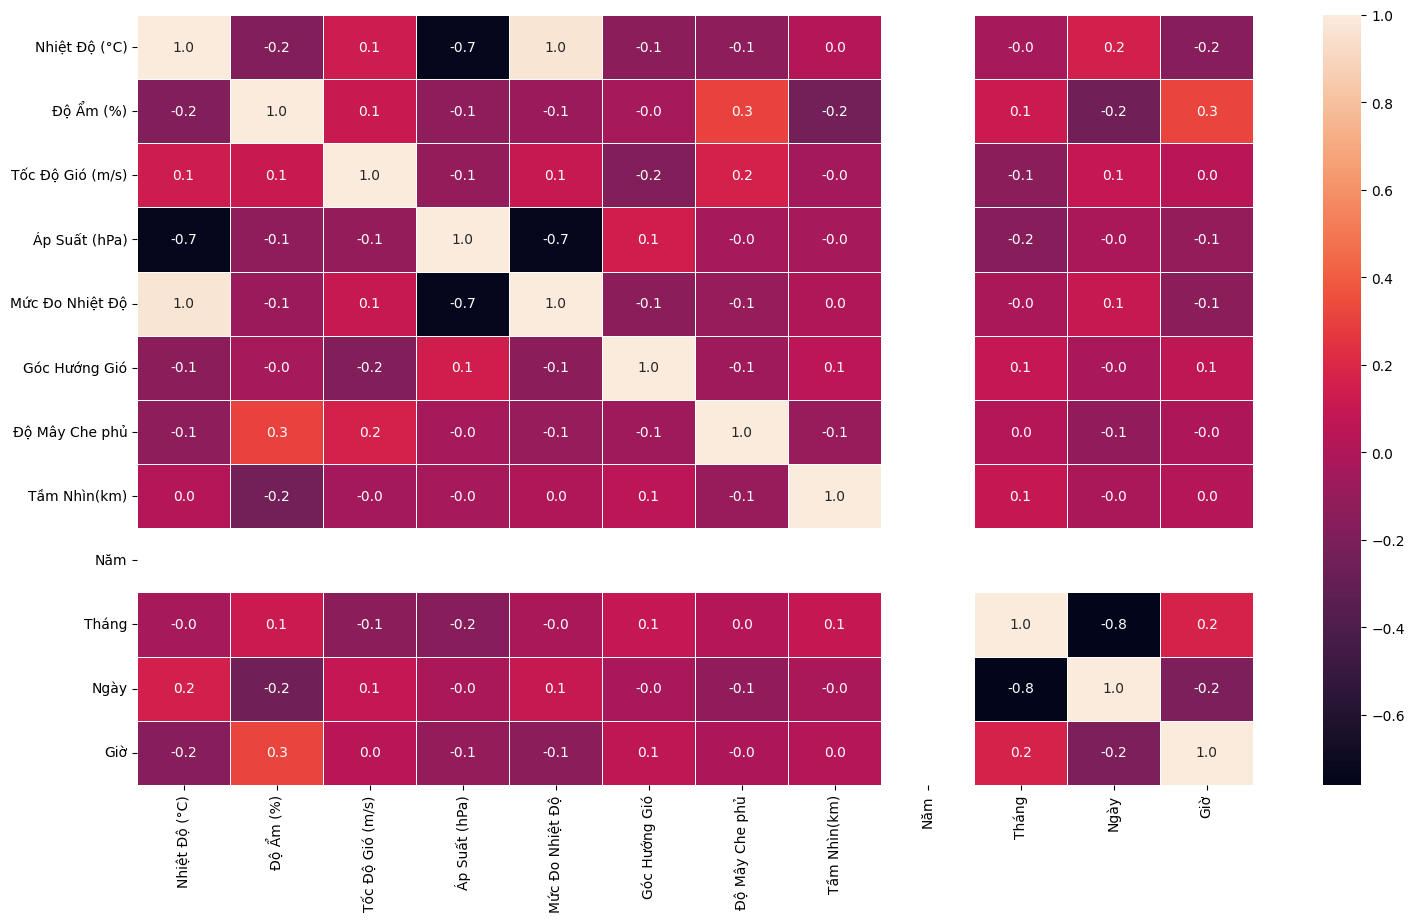

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

f,ax = plt.subplots(figsize=(18, 10))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

**Các biến định lượng và các giá trị bị mất**

In [ ]:
data[quantitative].describe()

,Nhiệt Độ (°C),Độ Ẩm (%),Tốc Độ Gió (m/s),Áp Suất (hPa),Mức Đo Nhiệt Độ,Góc Hướng Gió,Độ Mây Che phủ,Tầm Nhìn(km)
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,25.096430,74.707273,3.021503,1014.949697,26.607491,114.106061,72.615152,9721.945455
std,3.738261,13.593233,1.991651,4.026054,5.425476,107.137999,31.589685,1059.267448
min,14.090000,28.000000,0.000000,1007.000000,14.090000,0.000000,0.000000,713.000000
25%,22.732500,66.000000,1.630000,1012.000000,23.072500,39.000000,48.000000,10000.000000
50%,25.365000,77.000000,2.570000,1015.000000,25.970000,77.000000,86.000000,10000.000000
75%,27.835000,85.000000,3.890000,1017.000000,30.547500,146.750000,100.000000,10000.000000
max,34.030000,100.000000,13.760000,1028.000000,41.010000,360.000000,100.000000,10000.000000


array([[<Axes: title={'center': 'Nhiệt Độ (°C)'}>,
        <Axes: title={'center': 'Độ Ẩm (%)'}>,
        <Axes: title={'center': 'Tốc Độ Gió (m/s)'}>],
       [<Axes: title={'center': 'Áp Suất (hPa)'}>,
        <Axes: title={'center': 'Mức Đo Nhiệt Độ'}>,
        <Axes: title={'center': 'Góc Hướng Gió'}>],
       [<Axes: title={'center': 'Độ Mây Che phủ'}>,
        <Axes: title={'center': 'Tầm Nhìn(km)'}>, <Axes: >]], dtype=object)

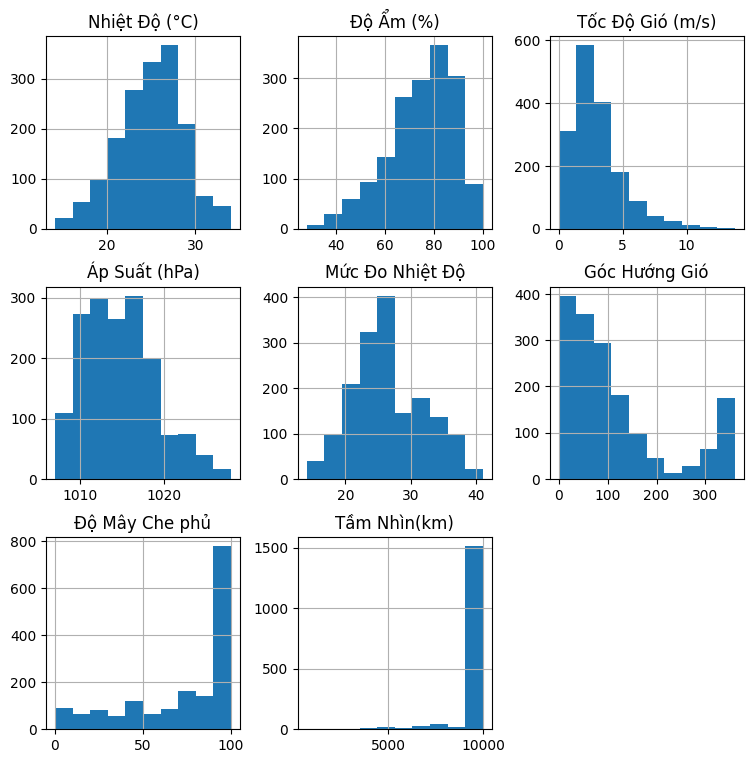

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 9, 9
data[quantitative].hist()

In [ ]:
data=data.drop('Tầm Nhìn(km)',axis=1)

<Axes: xlabel='Mô Tả Thời Tiết', ylabel='count'>

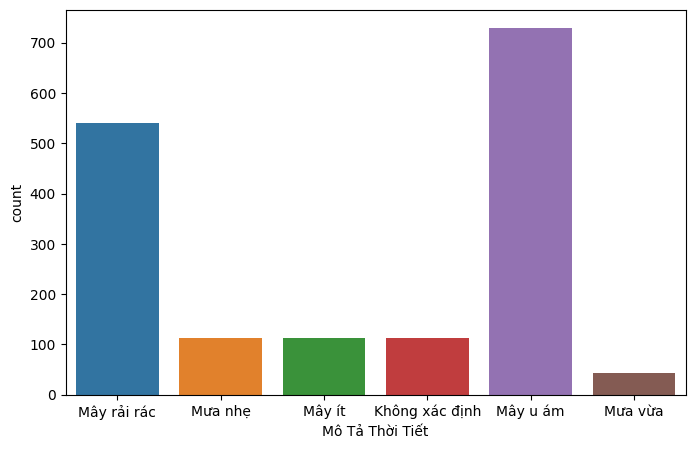

In [ ]:
import seaborn as sns

rcParams['figure.figsize'] = 8, 5
sns.countplot(x=data['Mô Tả Thời Tiết'])

In [ ]:
data['Mô Tả Thời Tiết'].value_counts(dropna=False)

Mây u ám          729
Mây rải rác       541
Mưa nhẹ           112
Mây ít            112
Không xác định    112
Mưa vừa            44
Name: Mô Tả Thời Tiết, dtype: int64

In [ ]:
data['Thời Tiết'].value_counts(dropna=False)

Nắng    1488
Mưa      162
Name: Thời Tiết, dtype: int64

In [ ]:
data.fillna(method='ffill', inplace=True)

Text(0, 0.5, 'Số Lượng')

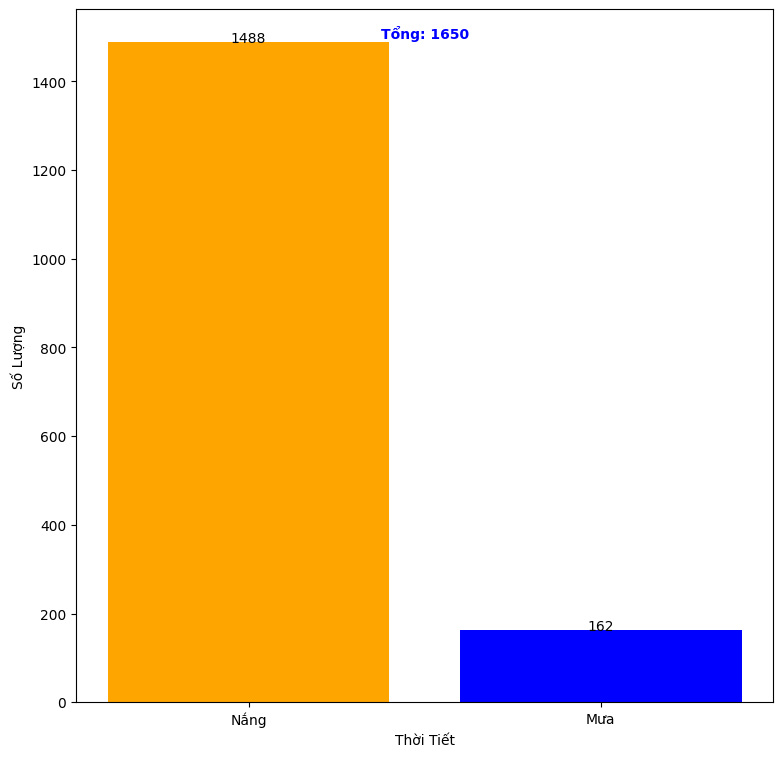

In [ ]:
value_counts = data['Thời Tiết'].value_counts(dropna=False)
colors = ['orange', 'blue']

plt.bar(value_counts.index, value_counts.values, color=colors)

for i, value in enumerate(value_counts.values):
    plt.text(i, value + 10, str(value), ha='center', va='center')

plt.text(0.5, max(value_counts.values) + 20, f'Tổng: {sum(value_counts.values)}', ha='center', va='center', fontweight='bold', color='blue')
plt.xlabel('Thời Tiết')
plt.ylabel('Số Lượng')


In [ ]:
#Tính phần trăm các giá trị bi thiếu
import numpy as np

# Tính tổng số ô trong bảng dữ liệu
totalCells = np.product(data.shape)

# Đếm số lượng giá trị thiếu sót cho mỗi cột
missingCount = data.isnull().sum()

# Tính tổng số lượng giá trị thiếu sót
totalMissing = missingCount.sum()

# Tính tỷ lệ phần trăm giá trị thiếu sót
percentageMissing = (totalMissing / totalCells) * 100

print(f"Tập dữ liệu thời tiết có {round(percentageMissing, 2)}% giá trị bị mất")


Tập dữ liệu thời tiết có 0.0% giá trị bị mất


<Figure size 1800x800 with 0 Axes>

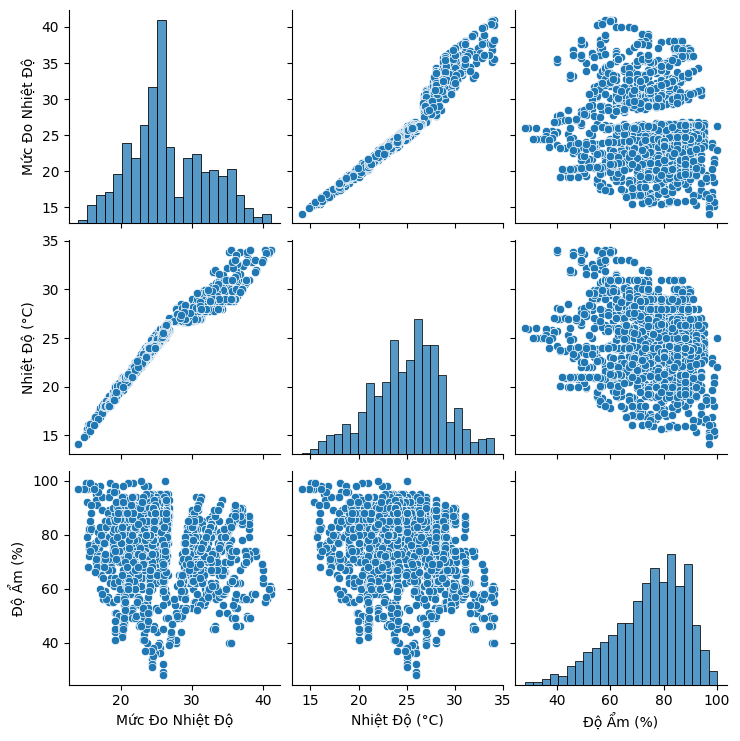

In [ ]:
plt.figure(figsize=(18,8))
sns.pairplot(data[['Mức Đo Nhiệt Độ','Nhiệt Độ (°C)', 'Độ Ẩm (%)' ]])
plt.show()

<Figure size 1800x800 with 0 Axes>

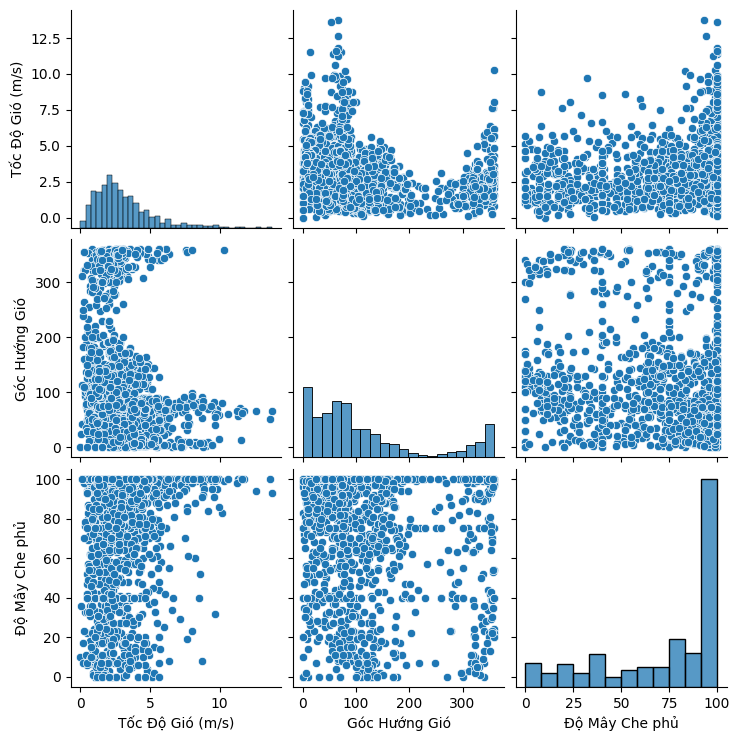

In [ ]:
plt.figure(figsize=(18,8))
sns.pairplot(data[['Tốc Độ Gió (m/s)', 'Góc Hướng Gió','Độ Mây Che phủ']])
plt.show()

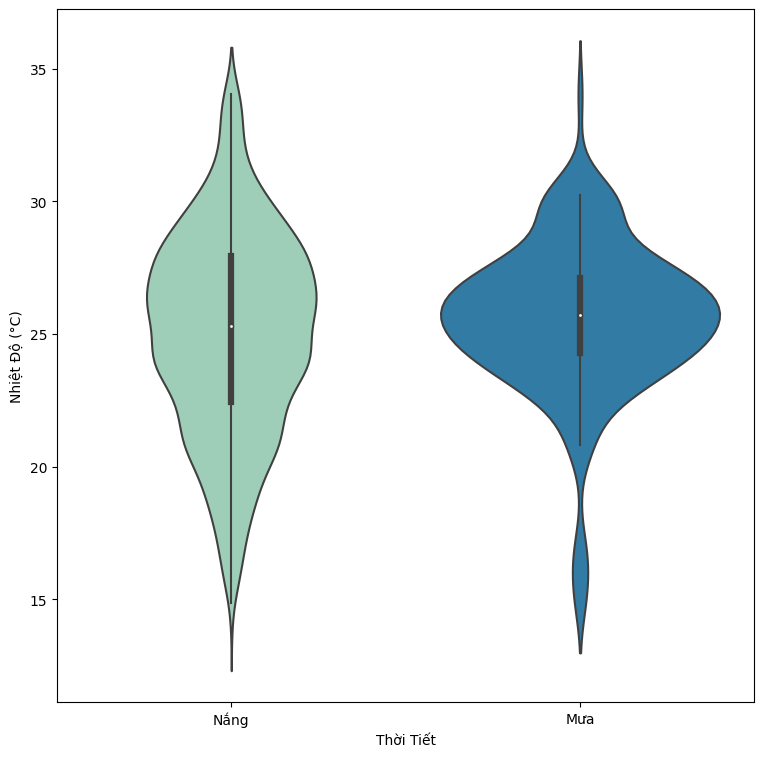

In [ ]:
sns.violinplot(x="Thời Tiết", y="Nhiệt Độ (°C)", data=data, palette="YlGnBu");

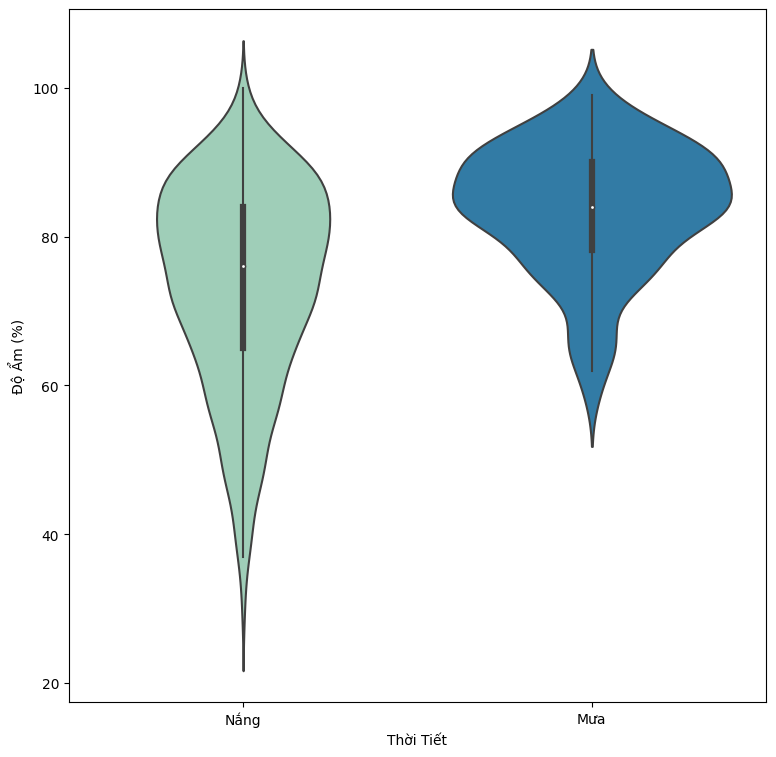

In [ ]:
sns.violinplot(x="Thời Tiết", y="Độ Ẩm (%)", data=data, palette="YlGnBu");

In [ ]:
def change_category_to_number(DailySummaryCat):
    if DailySummaryCat == 'Mây rải rác':
        return 1
    elif DailySummaryCat == 'Mưa nhẹ':
        return 2
    elif DailySummaryCat == 'Mây ít':
        return 3
    elif DailySummaryCat == 'Mưa':
        return 4
    elif DailySummaryCat == 'Mây u ám':
        return 4
    elif DailySummaryCat == 'Không xác định':
        return 5

# Assuming 'Mô Tả Thời Tiết' is the column containing categorical values
data['Mô Tả'] = data['Mô Tả Thời Tiết'].apply(change_category_to_number)

data.fillna(method='ffill', inplace=True)

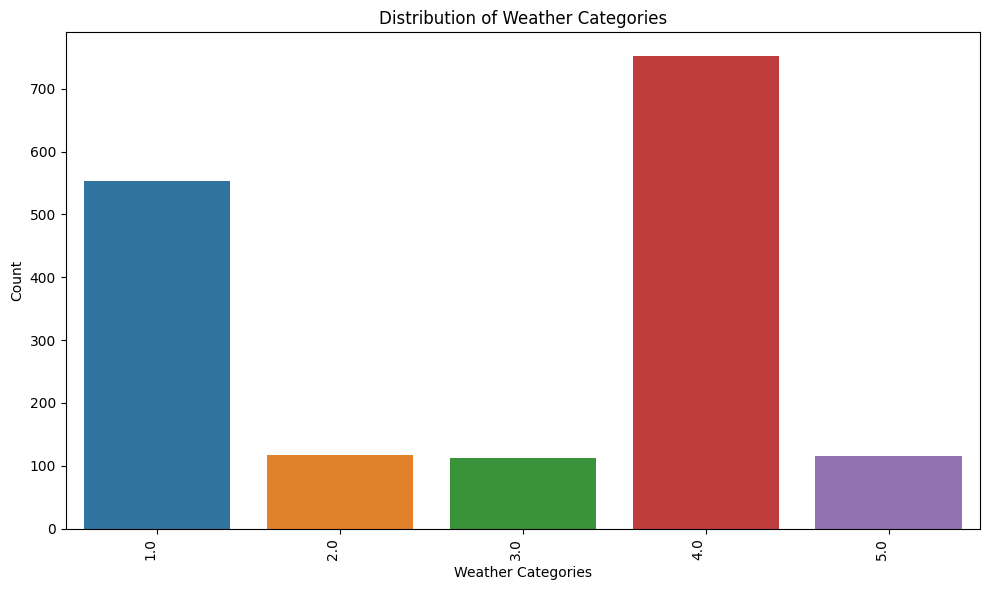

In [ ]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(x=data['Mô Tả'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.xlabel('Weather Categories')  # Add x-axis label
plt.ylabel('Count')  # Add y-axis label
plt.title('Distribution of Weather Categories')  # Add plot title
plt.tight_layout()
plt.show()

In [ ]:
def change_category(PrecipTypeCat):
    if PrecipTypeCat=='Nắng':
        return 0
    elif PrecipTypeCat=='Mưa':
        return 1

In [ ]:
data['Dự Báo'] = data['Thời Tiết'].apply(change_category)

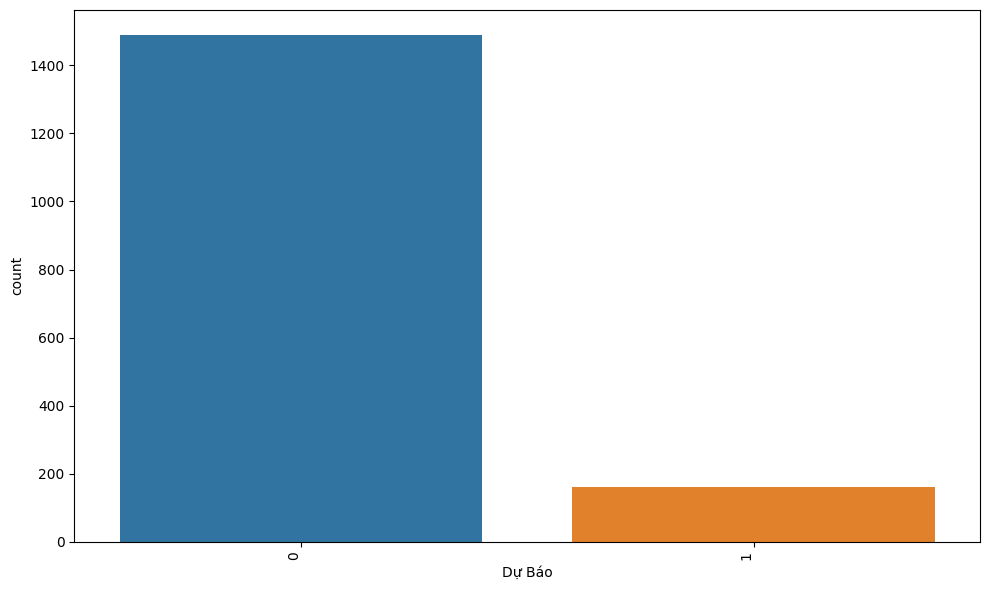

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x=data['Dự Báo'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
data.drop(['Địa Điểm','Ngày/Giờ','Thời Tiết','Mô Tả Thời Tiết','Ngày','Năm','Giờ'],axis=1,inplace=True)
data.head()

,Nhiệt Độ (°C),Độ Ẩm (%),Tốc Độ Gió (m/s),Áp Suất (hPa),Mức Đo Nhiệt Độ,Góc Hướng Gió,Độ Mây Che phủ,Tháng,Mô Tả,Dự Báo
0,27.01,94,2.06,1012,31.20,260,40,11,1.0,0
1,25.00,82,3.30,1019,25.70,55,100,11,2.0,1
2,25.99,89,0.51,1016,25.99,0,75,11,2.0,1
3,25.95,78,4.63,1018,25.95,80,20,11,3.0,0
4,26.99,88,1.86,1013,30.50,107,74,11,1.0,0


**Xây dựng Mô Hình**

In [ ]:
X = data[['Nhiệt Độ (°C)', 'Độ Ẩm (%)', 'Tốc Độ Gió (m/s)', 'Áp Suất (hPa)', 'Mức Đo Nhiệt Độ', 'Góc Hướng Gió', 'Độ Mây Che phủ','Mô Tả']]
y = data['Dự Báo']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=128)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)
print("Original shape:",X_train.shape)
print('Shape of PCA data:',X_train_pca.shape)

Original shape: (1155, 8)
Shape of PCA data: (1155, 2)


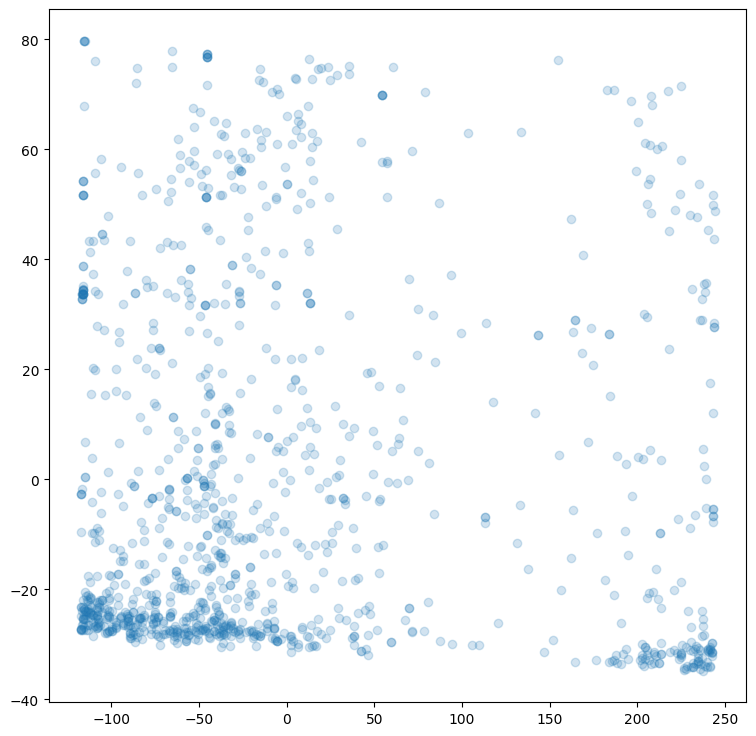

In [ ]:
#Sử dụng plt từ Matplotlib  để vẽ biểu đồ phân tán
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], alpha=0.2)

**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report,precision_recall_fscore_support


# Tạo và huấn luyện mô hình Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
rf_predictions = rf_model.predict(X_test)

# Đánh giá hiệu suất
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f'Random Forest Accuracy: {rf_accuracy}')

# In bảng Precision, Recall, và F1-score
print(classification_report(y_test, rf_predictions))

# Lấy Precision, Recall và F1-score cho mỗi lớp
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, rf_predictions)

# In giá trị cho từng lớp
for i in range(len(precision)):
    print(f'Class {i + 1}:')
    print(f'  Precision: {precision[i]}')
    print(f'  Recall: {recall[i]}')
    print(f'  F1-score: {f1_score[i]}')
    print('-----------------')


Random Forest Accuracy: 0.9696969696969697
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       450
           1       1.00      0.67      0.80        45

    accuracy                           0.97       495
   macro avg       0.98      0.83      0.89       495
weighted avg       0.97      0.97      0.97       495

Class 1:
  Precision: 0.967741935483871
  Recall: 1.0
  F1-score: 0.9836065573770492
-----------------
Class 2:
  Precision: 1.0
  Recall: 0.6666666666666666
  F1-score: 0.8
-----------------


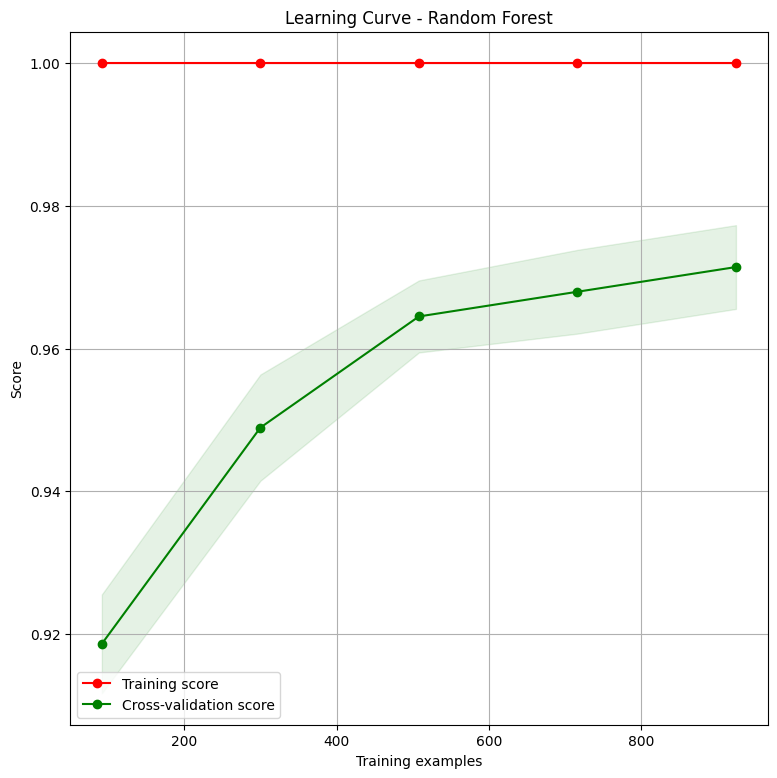

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                         n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Sử dụng hàm plot_learning_curve
plot_learning_curve(rf_model, "Learning Curve - Random Forest", X_train, y_train, cv=5, n_jobs=-1)
plt.show()

Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support

# Tạo và huấn luyện mô hình Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
gb_predictions = gb_model.predict(X_test)

# Đánh giá hiệu suất
gb_accuracy = accuracy_score(y_test, gb_predictions)
print(f'Gradient Boosting Accuracy: {gb_accuracy}')

# In bảng Precision, Recall, và F1-score
print(classification_report(y_test, gb_predictions))

# Lấy Precision, Recall và F1-score cho mỗi lớp
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, gb_predictions)

# In giá trị cho từng lớp
for i in range(len(precision)):
    print(f'Class {i + 1}:')
    print(f'  Precision: {precision[i]}')
    print(f'  Recall: {recall[i]}')
    print(f'  F1-score: {f1_score[i]}')
    print('-----------------')

Gradient Boosting Accuracy: 0.9838383838383838
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       450
           1       1.00      0.82      0.90        45

    accuracy                           0.98       495
   macro avg       0.99      0.91      0.95       495
weighted avg       0.98      0.98      0.98       495

Class 1:
  Precision: 0.982532751091703
  Recall: 1.0
  F1-score: 0.9911894273127753
-----------------
Class 2:
  Precision: 1.0
  Recall: 0.8222222222222222
  F1-score: 0.9024390243902439
-----------------


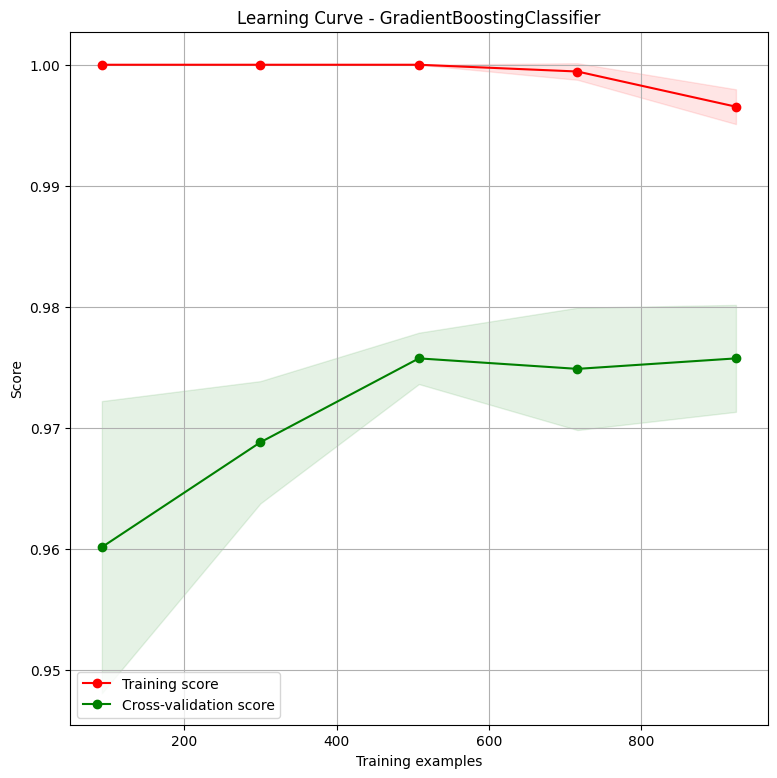

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.naive_bayes import GaussianNB

gb_model  = GradientBoostingClassifier()

# Vẽ learning curve GradientBoostingClassifier
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


plot_learning_curve(gb_model, "Learning Curve - GradientBoostingClassifier", X_train, y_train, cv=5, n_jobs=4)
plt.show()

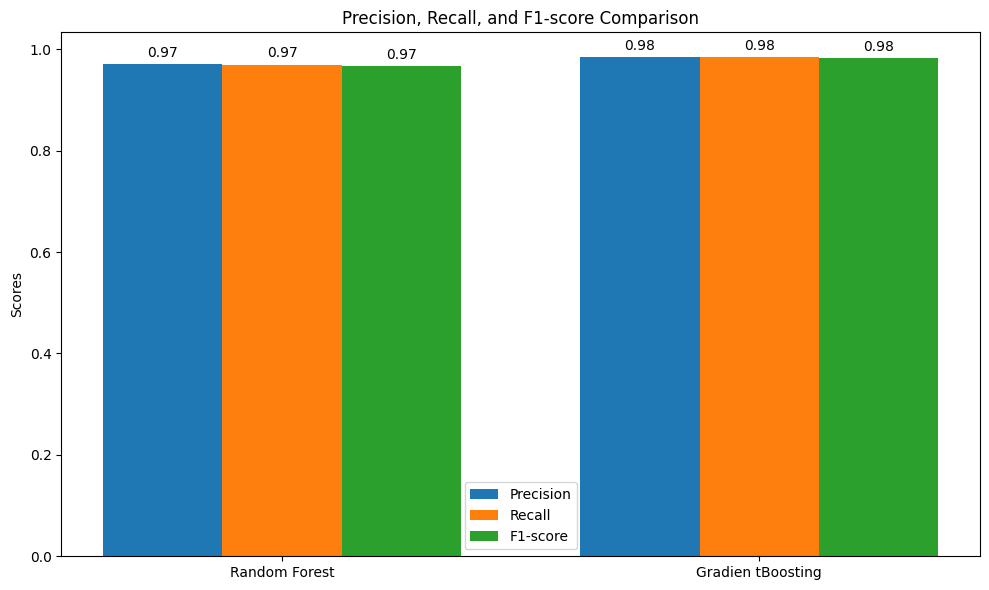

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Kết quả từ Random Forest
rf_precision, rf_recall, rf_f1_score, _ = precision_recall_fscore_support(y_test, rf_predictions, average='weighted')

# Kết quả từ
gb_precision, gb_recall, gb_f1_score, _ = precision_recall_fscore_support(y_test, gb_predictions, average='weighted')

# Dữ liệu cho biểu đồ
labels = ['Random Forest', 'Gradien tBoosting']
precision_scores = [rf_precision, gb_precision]
recall_scores = [rf_recall, gb_recall]
f1_scores = [rf_f1_score, gb_f1_score]

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

# Biểu đồ cột
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, precision_scores, width, label='Precision')
rects2 = ax.bar(x, recall_scores, width, label='Recall')
rects3 = ax.bar(x + width, f1_scores, width, label='F1-score')

# Thêm nhãn, tiêu đề và chú thích
ax.set_ylabel('Scores')
ax.set_title('Precision, Recall, and F1-score Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Hiển thị giá trị trên cột
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()

In [ ]:
!pip install joblib

In [ ]:
import joblib

# Lưu mô hình vào một tệp
model_filename = '/content/gdrive/MyDrive/Chuyen_De_Tot_Nghiep_01/Đồ_Án_CĐTN_01/gradient_boosting_model.joblib'
joblib.dump(gb_model, model_filename)

print(f'Model saved as {model_filename}')

Model saved as /content/gdrive/MyDrive/Chuyen_De_Tot_Nghiep_01/Đồ_Án_CĐTN_01/gradient_boosting_model.joblib


In [ ]:
# Load the model from the saved file
loaded_model = joblib.load('/content/gdrive/MyDrive/Chuyen_De_Tot_Nghiep_01/Đồ_Án_CĐTN_01/gradient_boosting_model.joblib')

loaded_model

GradientBoostingClassifier()

In [ ]:
if hasattr(loaded_model, 'classes_'):
    print("Mô hình đã được đào tạo.")
else:
    print("Mô hình chưa được đào tạo")

Mô hình đã được đào tạo.


In [ ]:
import numpy as np

# Gather user input
temperature = float(input("Nhập Nhiệt Độ (°C): "))
humidity = float(input("Nhập Độ Ẩm (%): "))
wind_speed = float(input("Nhập Tốc Độ Gió (m/s): "))
atmospheric_pressure = float(input("Nhập Áp Suất (hPa): "))
temperature_measurement = float(input("Nhập Mức Đo Nhiệt Độ: "))
wind_direction = float(input("Nhập Góc Hướng Gió: "))
cloud_coverage = float(input("Nhập Độ Mây Che phủ (%): "))
weather_description = float(input("Nhập Mô Tả Thời Tiết: "))

# Tạo một mảng numpy từ dữ liệu người dùng
user_input = np.array([[temperature, humidity, wind_speed, atmospheric_pressure, temperature_measurement, wind_direction, cloud_coverage, weather_description]])

user_prediction = loaded_model.predict(user_input)

predicted_weather = "mưa" if user_prediction[0] == 0 else "nắng"

print(f'Thời Tiết Dự Đoán: {predicted_weather}')


Nhập Nhiệt Độ (°C): 25
Nhập Độ Ẩm (%): 82
Nhập Tốc Độ Gió (m/s): 3.3
Nhập Áp Suất (hPa): 1019
Nhập Mức Đo Nhiệt Độ: 25.7
Nhập Góc Hướng Gió: 55
Nhập Độ Mây Che phủ (%): 100
Nhập Mô Tả Thời Tiết: 1.0
Thời Tiết Dự Đoán: nắng


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
